# 5-limit tuning vs equal tempered

In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Audio
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets


SR = 44100

rc('animation', html='jshtml')

def play(samples):
    display(Audio(samples, rate = SR, autoplay = True))

In [24]:
def sin_wave(freq, duration):
    t = np.arange(duration * SR) / SR
    wave = np.sin(2 * np.pi * t * freq)
    return wave


In [25]:
intervals = pd.read_html('https://en.wikipedia.org/wiki/Five-limit_tuning')[8]

intervals = intervals.iloc[3:,:-2].set_index(0)
intervals.index.name = 'Name'
intervals.columns = 'Short', 'Semitones', 'Sym1', 'Sym2', 'AsymStd', 'AsymExtra'
intervals



,Short,Semitones,Sym1,Sym2,AsymStd,AsymExtra
Name,,,,,,
Perfect unison,P1,0,1/1,1/1,1/1,1/1
Minor second,m2,1,16/15,16/15,16/15,16/15
Major second,M2,2,9/8,10/9,9/8,9/8
Minor third,m3,3,6/5,6/5,6/5,6/5
Major third,M3,4,5/4,5/4,5/4,5/4
Perfect fourth,P4,5,4/3,4/3,4/3,4/3
Augmented fourth,A4,6,45/32,45/32,45/32,25/18
Diminished fifth,d5,6,64/45,64/45,64/45,36/25
Perfect fifth,P5,7,3/2,3/2,3/2,3/2


### Scegliere i due intervalli della triade in relazione alla nota base (C)
* esempio: per construire l'accordo di do maggiore, andremo a selezionare "Major third" e "Perfect fifth"

In [4]:
first_interval_widget = widgets.Dropdown(options = intervals.index)
second_interval_widget = widgets.Dropdown(options = intervals.index)

temperment_widget = widgets.Dropdown(options = intervals.columns[-4:])

widgets.Box([first_interval_widget, second_interval_widget, temperment_widget])

Box(children=(Dropdown(options=('Perfect unison', 'Minor second', 'Major second', 'Minor third', 'Major third'…

In [26]:
first_interval_name = first_interval_widget.value
second_interval_name = second_interval_widget.value
temperment_name = temperment_widget.value

first_semitones = eval(intervals.loc[first_interval_name, 'Semitones'])
first_ratio_et = 2 ** (first_semitones / 12)
first_ratio_ji = eval(intervals.loc[first_interval_name, temperment_name])

second_semitones = eval(intervals.loc[second_interval_name, 'Semitones'])
second_ratio_et = 2 ** (second_semitones / 12)
second_ratio_ji = eval(intervals.loc[second_interval_name, temperment_name])

In [27]:
BASE_NOTE = 256
duration = 3.0

first_freq = BASE_NOTE
second_freq_et = first_freq * first_ratio_et
second_freq_ji = first_freq * first_ratio_ji
third_freq_et = first_freq * second_ratio_et
third_freq_ji = first_freq * second_ratio_ji

first_sample = sin_wave(first_freq, duration)
second_sample_et = sin_wave(second_freq_et, duration)
second_sample_ji = sin_wave(second_freq_ji, duration)
third_sample_et = sin_wave(third_freq_et, duration)
third_sample_ji = sin_wave(third_freq_ji, duration)


### Ascolta:
- nella **prima metà** del campione si sente l'accordo secondo il sistema **ugualmente temperato**
- nella **seconda metà** del campione quello secondo il sistema "just intonation" nello specifico **"five limit tuning"**

Noterete come nell'ugualmente temperato siano presenti dei battimenti dovuti a rapporti non razionali delle frequenze che costituiscono l'accordo.

In [28]:
play( np.concatenate([first_sample + second_sample_et + third_sample_et,
                     first_sample + second_sample_ji + third_sample_ji]))


Text(0.5, 1.0, 'Perfect fifth - Just Intonation')

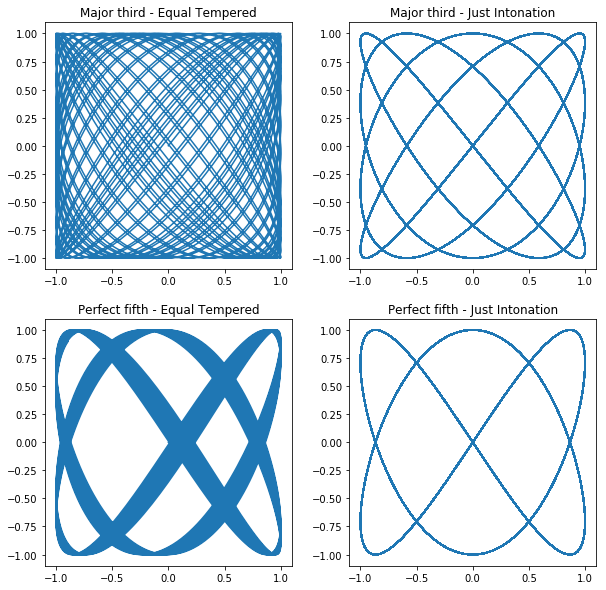

In [31]:
DELTA = 6000
start = 0 
end = start + DELTA


plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1).set_aspect(1)
plt.plot(first_sample[start:end], second_sample_et[start:end])
plt.title(first_interval_name + ' - Equal Tempered')

plt.subplot(2, 2, 2).set_aspect(1)
plt.plot(first_sample , second_sample_ji)
plt.title(first_interval_name + ' - Just Intonation')

plt.subplot(2, 2, 3).set_aspect(1)
plt.plot(first_sample[start:end] , third_sample_et[start:end])
plt.title(second_interval_name + ' - Equal Tempered')

plt.subplot(2, 2, 4).set_aspect(1)
plt.plot(first_sample , third_sample_ji)
plt.title(second_interval_name + ' - Just Intonation')

